# Interpolation for Squaring

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import sys
sys.path.append(os.path.join(os.getcwd(), '../build/'))
import pydeft as deft

Consider samples of a continuous function
\begin{equation}
    w(\mathbf{r}) = \cos{p x},
\end{equation}
such that we have enough samples to reconstruct the continuous function using Fourier-based interpolations. 

If we are interested in the quantitiy $w^2$, just squaring the values of the sampled points may not be enough to fully reconstruct the square of the continuous function. This is because larger frequency components have been introduced during the squaring, which might not be adequately described by the sampled points. Hence, the same set of sampled points that could successfully reconstruct $w$ may not adequately reconstruct $w^2$. This can be rectified by first interpolating the sampled points in $w$ before squaring the values on a denser grid. 

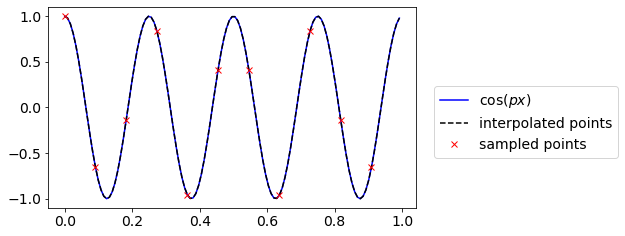

In [2]:
# create box and data array

dense_factor = 11
grd_pts = 11
dense_grd_pts = grd_pts*dense_factor

box_vectors = np.eye(3)
box = deft.Box(box_vectors)

x_sparse =  np.arange(grd_pts)/grd_pts
x_dense =  np.arange(dense_grd_pts)/dense_grd_pts
x,y,z = np.meshgrid(x_sparse, np.arange(5)/5, np.arange(5)/5,indexing='ij')
p = np.pi*8
data = deft.Double3D([grd_pts, 5, 5])
data[...] = np.cos(p*x)

data_dense = deft.fourier_interpolate(data, [dense_grd_pts, 5, 5])    

# font
plt.rc('font', size=14)
fig = plt.figure(figsize=[9,3.5])
plt.plot(x_dense, np.cos(p*x_dense), '-b')
plt.plot(x_dense, data_dense[:,0,0], '--k')
plt.plot(x_sparse, data[:,0,0], 'rx')
plt.legend(['$\cos(p x)$', 'interpolated points', 'sampled points'], loc=(1.05,0.25))
plt.tight_layout()
plt.show()

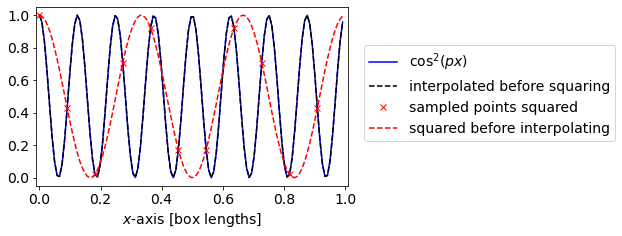

In [3]:
sparse_squared = deft.fourier_interpolate(data*data, [dense_grd_pts, 5, 5])        
    
# plot
plt.rc('font', size=14)
fig = plt.figure(figsize=[9,3.5])
plt.plot(x_dense, np.cos(p*x_dense)**2, '-b')
plt.plot(x_dense, data_dense[:,0,0]**2, '--k')
plt.plot(x_sparse, data[:,0,0]**2, 'xr')
plt.plot(x_dense, sparse_squared[:,0,0], '--r')
plt.xlim([-0.01, 1.01])
plt.xlabel('$x$-axis [box lengths]')
plt.legend(['$\cos^2(p x)$', 'interpolated before squaring', 'sampled points squared', 'squared before interpolating'], loc=(1.05,0.25))
plt.tight_layout()
plt.show()